In [1]:
from core.entity.Xdf import Xdf, EmbeddedValueError
from core.entity.Base import Measurements, Units, UnitRegistry
import os, sys
import numpy as np
# jupyter specific stuff
import matplotlib.pyplot as plot
import pint

xdf_path = os.path.abspath('./cars/testing/volvo-motronic44-test/rev5b.xdf')
bin_path = os.path.abspath('./cars/testing/volvo-motronic44-test/607_rev5b.bin')
tune = Xdf.from_path(xdf_path, bin_path)

ignition_map = tune.Tables[0]
functions = {f.title: f for f in tune.Functions}
linker = functions['linker normai']
linker.interpolated
zwb = tune.xpath('./XDFCONSTANT[1]')[0]
ignition_map.x.value

Magnitude,[2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 22.0 24.0 26.0 28.0 30.0 36.0]
Units,revolutions_per_minute


In [2]:
ignition_map.y.value

Magnitude,[10.0 20.0 30.0 40.0 68.0 70.0 80.0 109.23076923076923 110.0 120.0 130.0 157.64705882352942 158.23529411764707 158.8235294117647 159.41176470588235 160.0]
Units,millisecond


In [3]:
ignition_map.z.value

Magnitude,[[10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0] [10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0] [10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0] [10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0] [0.1428571428571388 0.1428571428571388 1.7619047619047592 10.0 1.0952380952380736 10.0 1.428571428571388 1.5714285714285552 1.7619047619047592 1.9047619047618696 0.1 0.1 0.1 0.1 0.1 0.1] [10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0] [10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0] [10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0] [10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0] [10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0] [10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0] [10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0] [10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0] [10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0] [10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0] [10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0]]
Units,degree


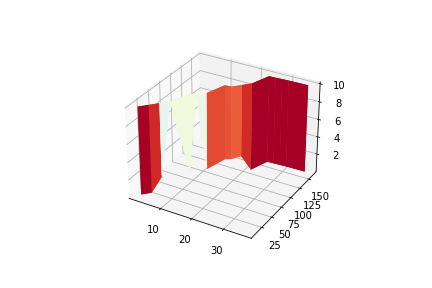

In [10]:
%matplotlib widget
#plot.ion()
fig = plot.figure()
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.resizable = True
axis = plot.axes(projection='3d')
axis.plot_surface(
  [ignition_map.x.value.magnitude],
  [ignition_map.y.value.magnitude],
  ignition_map.z.value.magnitude,
  cmap='RdYlBu'
)
plot.show()

In [4]:
try:
  zwb.value = 12.24 + 5
except EmbeddedValueError as e:
  #raise(e)
  print(f"Error setting value {e.val} out of logical bounds {e.min}, {e.max}")
  print(zwb.value)

Error setting value [17.24] out of logical bounds [0.], [12.24]
[5.472] dimensionless
